In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import fsspec

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6

In [2]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")
list(cat)

['LLC4320_grid',
 'LLC4320_SST',
 'LLC4320_SSS',
 'LLC4320_SSH',
 'LLC4320_SSU',
 'LLC4320_SSV']

In [3]:
# ds =  cat.LLC4320_SSH.to_dask()
dsu = cat.LLC4320_SSU.to_dask()
dsv = cat.LLC4320_SSV.to_dask()

ValueError: Bad Request: https://www.googleapis.com/download/storage/v1/b/pangeo-ecco-llc4320/o/ssu%2F.zmetadata?alt=media
b'User project specified in the request is invalid.'

In [ ]:
ds['U'] = dsu.U
ds['V'] = dsv.V

In [ ]:
# a trick to make things work a bit faster
coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)

In [ ]:
grid = xgcm.Grid(ds)

In [ ]:
import xgcm

# define the connectivity between faces
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}

# create the grid object
grid = xgcm.Grid(ds, periodic=False, face_connections=face_connections)
grid

In [ ]:
ds

In [ ]:
dssub = ds.isel(time=100,i=slice(100,200),i_g=slice(100,200))

In [ ]:
dssub

In [ ]:
grid.diff_2d_vector({'X':ds.U, 'Y':ds.V}, boundary='fill')['X'].plot()

(array([1.2000e+01, 1.3120e+03, 9.1600e+03, 2.7310e+04, 2.7989e+04,
        8.5840e+03, 2.4560e+03, 2.3200e+03, 1.0340e+03, 1.5400e+02]),
 array([-0.58710885, -0.43347552, -0.27984223, -0.1262089 ,  0.02742441,
         0.18105772,  0.33469105,  0.48832434,  0.64195764,  0.795591  ,
         0.9492243 ], dtype=float32),
 <a list of 10 Patch objects>)

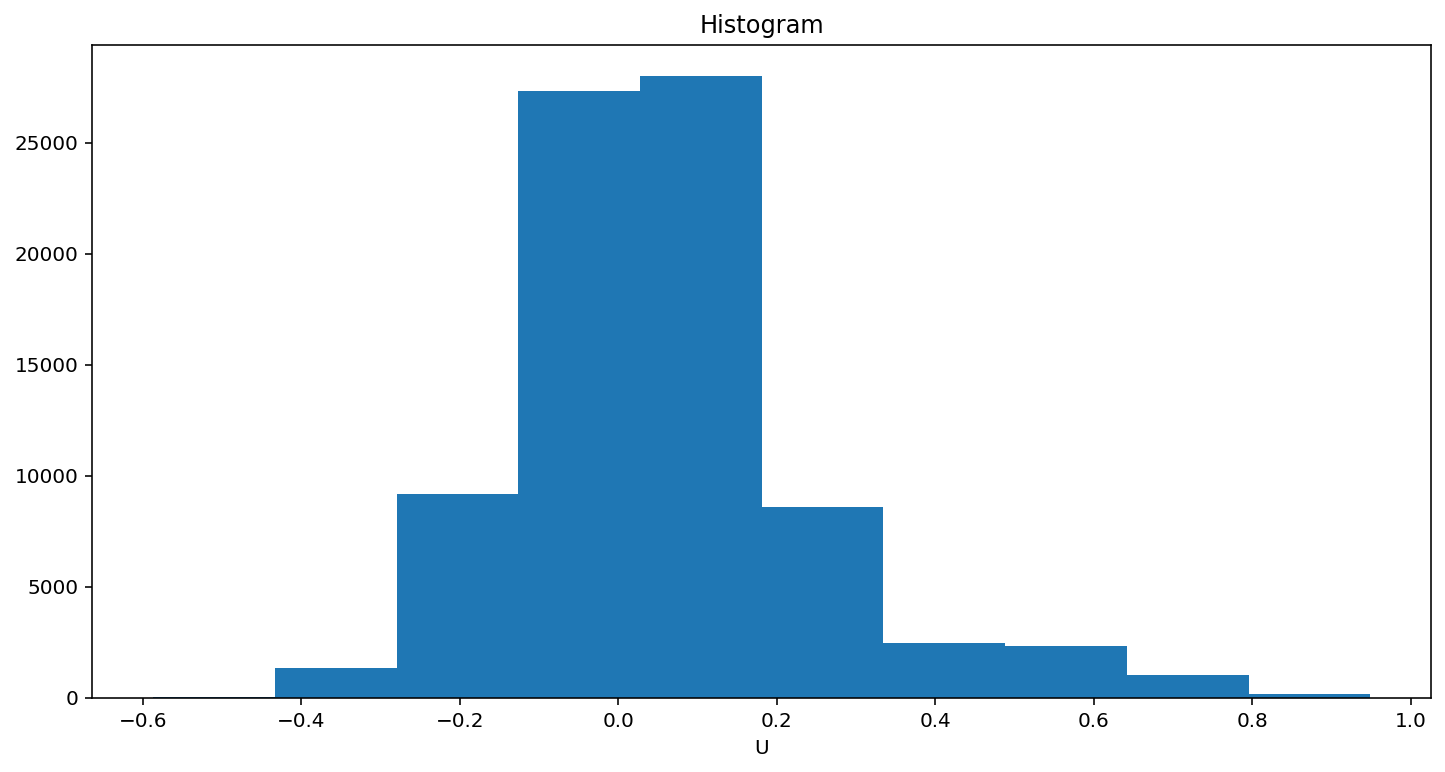

In [48]:
ds.isel(i_g=slice(100,200),j=slice(100,200)).U.plot()